## Data Source

In [170]:
file_name_1 = (
    "../data/WikiRate-2024_04_07_165420-Climate_100_GHG_Emissions+Answer-extended.csv"
)

file_name_2 = "../data/WikiRate-2024_04_07_212938-Fuel_consumption_from_non_renewable_sources_GRI_302_1_a_formerly_G4_EN3_a+Answer.csv"

## Load data from csv

In [171]:
import pandas as pd

In [172]:
df_emission = pd.read_csv(
    file_name_1, header=4
)  # as the top rows are comments, headers and csv are starting in the 5th row (index 4)
df_fuel_consumption = pd.read_csv(
    file_name_2, header=4
)  # as the top rows are comments, headers and csv are starting in the 5th row (index 4)

In [173]:
# check if data is related
# we assume the company name is a unique identifier

overlap = set(df_emission.Company.unique()).intersection(set(df_fuel_consumption.Company.unique()))
list(overlap)[:10]

['Fiat Chrysler Automobiles (FCA)',
 'Coal India Limited',
 'Wesfarmers Limited',
 'Canadian Natural Resources',
 'China Shenhua Energy',
 'Rolls-Royce Holdings',
 'Reliance Industries Limited',
 'Korea Electric Power',
 'Toray Industries',
 'Panasonic Corporation']

In [174]:
# relative overlap
relative_overlap = len(overlap) / len(df_emission.Company.unique())
relative_overlap

0.92

### Prepare Emission data

In [175]:
df_emission.head()

,Answer Page,Metric,Company,Year,Value,Source Page,Answer ID,Original Source,Source Count,Comments
0,https://wikirate.org/~15558672,Global Reporting Initiative+Indirect greenhous...,Hitachi Ltd.,2022,268.75,https://wikirate.org/~15558046,15558672.0,NaN,1.0,"Pg62- ""Indirect emissions from the production ..."
1,https://wikirate.org/~15354645,Global Reporting Initiative+Indirect greenhous...,Lockheed Martin,2022,508459,https://wikirate.org/~15354635,15354645.0,NaN,1.0,"pg. 44 ""SCOPE 2 EMISSIONS (2022) Gross Locatio..."
2,https://wikirate.org/~15354567,Global Reporting Initiative+Indirect greenhous...,Caterpillar,2022,800000,https://wikirate.org/~15354555,15354567.0,https://s7d2.scene7.com/is/content/Caterpillar...,1.0,"pg. 44 ""Scope 2 Location-based (million metric..."
3,https://wikirate.org/~15354729,Global Reporting Initiative+Indirect greenhous...,Koninklijke Philips N.V,2022,23000,https://wikirate.org/~15354717,15354729.0,https://www.results.philips.com/publications/a...,1.0,"pg. 59 ""Operational carbon footprint by scope ..."
4,https://wikirate.org/~15327015,Global Reporting Initiative+Indirect greenhous...,Volkswagen AG,2022,2110000,https://wikirate.org/~15327007,15327015.0,https://www.volkswagenag.com/presence/nachhalt...,1.0,"pg. 53 ""Scope 2 GHG emissions (absolute) in mi..."


In [176]:
df_emission.describe()

,Year,Answer ID,Source Count
count,1681.000000,1.125000e+03,1125.000000
mean,2019.355146,1.020196e+07,1.051556
std,1.654175,4.141212e+06,0.247783
min,2017.000000,3.149318e+06,1.000000
25%,2018.000000,5.398302e+06,1.000000
50%,2019.000000,1.265163e+07,1.000000
75%,2021.000000,1.265399e+07,1.000000
max,2022.000000,1.596019e+07,3.000000


In [177]:
# filter by metric
df_emission.Metric.value_counts()

Metric
Global Reporting Initiative+Direct greenhouse gas (GHG) emissions (Scope 1), GRI 305-1-a (formerly G4-EN15-a)    561
Global Reporting Initiative+Indirect greenhouse gas (GHG) emissions (Scope 2), GRI 305-2 (formerly G4-EN16-a)    560
Commons+Greenhouse Gas Emissions Scope 1 and 2 combined                                                          560
Name: count, dtype: int64

In [178]:
selected_metric = "Commons+Greenhouse Gas Emissions Scope 1 and 2 combined"
df_emission = df_emission[df_emission.Metric==selected_metric]

In [179]:
# select columns and rename
df_emission = df_emission[["Company", "Year", "Value"]]
df_emission.rename({"Value": "value_emissions_tonnes_co2e"}, axis=1, inplace=True)

In [180]:
# remove "Unknown" values
df_emission = df_emission[~df_emission.value_emissions_tonnes_co2e.str.startswith("Unknown")]
df_emission.value_emissions_tonnes_co2e = df_emission.value_emissions_tonnes_co2e.astype(float)

In [181]:
len(df_emission), df_emission.head()

(500,
                             Company  Year  value_emissions_tonnes_co2e
 51             Procter & Gamble Co.  2022                    2325606.0
 52  Fiat Chrysler Automobiles (FCA)  2022                    4050209.0
 53               Ford Motor Company  2022                    3000000.0
 54                          BP plc.  2022                    1500030.4
 55                     BHP Billiton  2022                   14000000.0)

### Prepare fuel consumption data

In [182]:
df_fuel_consumption.head()

,Answer Page,Metric,Company,Year,Value,Source Page
0,https://wikirate.org/~18085259,Global Reporting Initiative+Fuel consumption f...,Gildan Activewear Inc.,2023,1310000,https://wikirate.org/~18085203
1,https://wikirate.org/~18084377,Global Reporting Initiative+Fuel consumption f...,Sports Direct,2023,825014.82,https://wikirate.org/~18084191
2,https://wikirate.org/~18082944,Global Reporting Initiative+Fuel consumption f...,Ralph Lauren Corporation,2023,802692,https://wikirate.org/~18082539
3,https://wikirate.org/~18082850,Global Reporting Initiative+Fuel consumption f...,Nike Inc.,2023,769464,https://wikirate.org/~18082680
4,https://wikirate.org/~13924743,Global Reporting Initiative+Fuel consumption f...,Itochu,2023,295271,https://wikirate.org/~15553023


In [183]:
df_fuel_consumption.Metric.value_counts()

Metric
Global Reporting Initiative+Fuel consumption from non-renewable sources, GRI 302-1-a (formerly G4-EN3-a)    3544
Name: count, dtype: int64

In [184]:
df_fuel_consumption.describe()

,Year
count,3544.000000
mean,2017.289503
std,2.991991
min,2003.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2023.000000


In [185]:
# select columns and rename
df_fuel_consumption = df_fuel_consumption[["Company", "Year", "Value"]]
df_fuel_consumption.rename({"Value": "value_fuel_consumption_gigajoules"}, axis=1, inplace=True)

In [187]:
# remove "Unknown" values
df_fuel_consumption.value_fuel_consumption_gigajoules = df_fuel_consumption.value_fuel_consumption_gigajoules.apply(lambda val: None if val.lower() == "unknown" else val)
df_fuel_consumption = df_fuel_consumption.dropna()
df_fuel_consumption.value_fuel_consumption_gigajoules = df_fuel_consumption.value_fuel_consumption_gigajoules.astype(float)

In [188]:
df_fuel_consumption.head()

,Company,Year,value_fuel_consumption_gigajoules
0,Gildan Activewear Inc.,2023,1310000.00
1,Sports Direct,2023,825014.82
2,Ralph Lauren Corporation,2023,802692.00
3,Nike Inc.,2023,769464.00
4,Itochu,2023,295271.00


In [189]:
len(df_fuel_consumption)

1701

### Select and join

In [190]:
df_emission.Company = df_emission.Company.astype(str)

In [191]:
df_fuel_consumption.Company = df_fuel_consumption.Company.astype(str)

In [192]:
import pandas as pd
df_joined = pd.merge(df_emission, df_fuel_consumption, on=["Company", "Year"], how="inner")
df_joined.head()

,Company,Year,value_emissions_tonnes_co2e,value_fuel_consumption_gigajoules
0,Airbus Group,2022,857000.0,11.2
1,BASF SE,2022,60426000.0,21240000.0
2,Sasol,2022,63571000.0,66000.0
3,Eni SpA,2022,40180000.0,395.1
4,Bayer AG,2022,3470000.0,17525000.0


In [193]:
# sanity check
len(df_joined), len(df_joined.Company.unique())

(94, 43)

<Axes: xlabel='Year'>

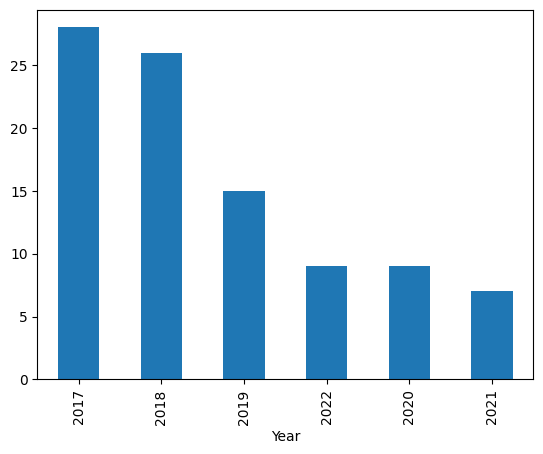

In [194]:
df_joined.Year.value_counts().plot(kind="bar")

In [211]:
df_joined.groupby("Company")[["Year"]].count().sort_values(by='Year', ascending=False)

,Year
Company,
Nestle,5
Toyota Motor Corporation,5
Rio Tinto,5
Repsol,4
Enel,4
Airbus Group,4
BHP Billiton,4
PepsiCo Inc.,4
Teck Resources,3


In [195]:
import matplotlib.pyplot as plt
airbus = df_joined[df_joined.Company=="Airbus Group"]
airbus.head()

,Company,Year,value_emissions_tonnes_co2e,value_fuel_consumption_gigajoules
0,Airbus Group,2022,857000.0,11.2
11,Airbus Group,2021,827000.0,12.1
18,Airbus Group,2020,783000.0,331845592.0
73,Airbus Group,2017,1013101.0,4830822.0


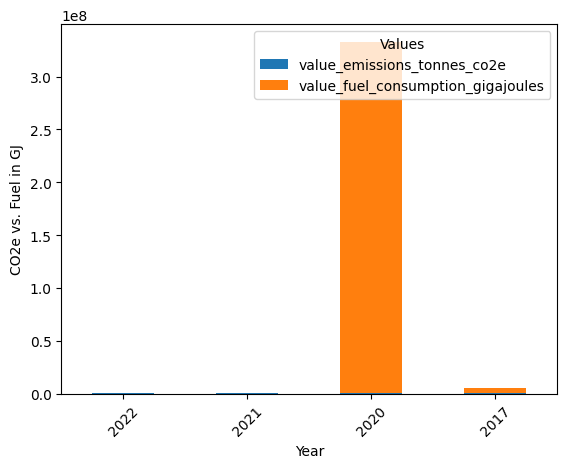

In [196]:
grouped = airbus.plot(kind='bar', stacked=True, x="Year")

# Plot stacked bar chart
plt.xlabel('Year')
plt.ylabel('CO2e vs. Fuel in GJ')
plt.legend(title='Values', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

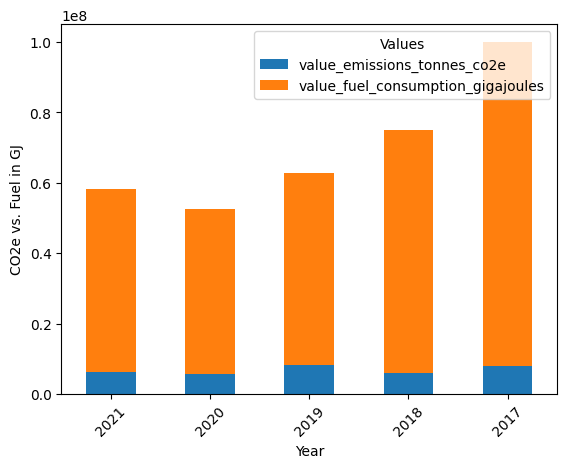

In [212]:
toyota = df_joined[df_joined.Company=="Toyota Motor Corporation"]

grouped = toyota.plot(kind='bar', stacked=True, x="Year")

# Plot stacked bar chart
plt.xlabel('Year')
plt.ylabel('CO2e vs. Fuel in GJ')
plt.legend(title='Values', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Excercise
1) Check if duplicates existed in the data before and after merge.
2) Try to understand and manually correct values for e.g. Gigajoule (or remove them)
3) Interpolate missing values using pandas (https://pandas.pydata.org/docs/user_guide/missing_data.html#interpolation) where only one or two values are missing.
4) Try to update the notebook, and intelligently impute the missing value instead of dropping them
5) Analyze the data related to Waste Generation, and preare and merge it with the data here.